# Лабораторная работа №1
## Выполнил студент группы БПИ2301 Булла Максим Анатольевич
### Задание №1
Описание условия задания

In [123]:
print("Hello, world!")

Hello, world!


### Задание №2
Написать генератор для случайных многомерных матриц

In [124]:
import random, numpy as np, time, matplotlib.pyplot as plt, matplotlib

In [125]:
VARIANT = 8
rng = np.random.default_rng(seed=100)

In [126]:
def generate_random_matrix(m=50, n=50, min_limit=-250, max_limit=1000+VARIANT):
    result = rng.integers(low=min_limit, high=max_limit+1, size=n*m)
    return result.reshape((m, n))

In [127]:
print(generate_random_matrix())

[[ 715  801  -94 ...  155  758  835]
 [ 364  756  963 ...  492 -208  482]
 [ 178  501  459 ...  594  118  165]
 ...
 [ 956  359  301 ...  838   71  604]
 [-138  260  838 ...  551  948  512]
 [ 885  563  -88 ... -236  850  188]]


### Задание №3
Методы сортировки

In [128]:
%matplotlib widget

In [129]:
def do_sort(method_f, just_print=False):
    start = time.perf_counter()
    measures = [[], []]
    averaging_m = 5
    
    for n_step in range(100, 1001, 100):
        for arr in generate_random_matrix(m=averaging_m, n=n_step):
            res = method_f(arr)
            if just_print:
                print(res)
                return
        measures[0].append(n_step)
        measures[1].append((time.perf_counter() - start) / averaging_m)
    return measures

### Сортировка обменом

In [130]:
def bubble_sort(arr):
    l = len(arr)
    for i in range(l):
        sorted = True
        
        for j in range(1, l):
            if arr[j - 1] > arr[j]:
                arr[[j - 1, j]] = arr[[j, j - 1]]
                sorted = False

        if sorted: break
    return arr

### Сортировка выбором

In [131]:
def selection_sort(arr):
    l = len(arr)
    for i in range(l - 1):
        minarg = i
        
        for j in range(i + 1, l):
            if arr[j] < arr[minarg]:
                minarg = j

        arr[[minarg, i]] = arr[[i, minarg]]

    return arr

### Сортировка вставкой

In [132]:
def insertion_sort(arr):
    l = len(arr)

    for i in range(1, l):
        j = i
        while j > 0:
            if arr[j - 1] > arr[j]:
                arr[[j - 1, j]] = arr[[j, j - 1]]
            else: 
                break
            j -= 1
            
    return arr

### Сортировка Шелла

In [133]:
def shell_sort(arr):
    l = len(arr)
    hop = l // 2

    while hop != 1:
        for i in range(hop, l):
            if arr[i] < arr[i - hop]:
                arr[[i - hop, i]] = arr[[i, i - hop]]
        hop //= 2
        
    return insertion_sort(arr)

### Сортировка быстрая

In [134]:
def partition(arr, start, end):
    p_i = random.randrange(start, end)
    arr[[p_i, end - 1]] = arr[[end - 1, p_i]]
    
    pivot = arr[end - 1]
    i = start - 1

    for j in range(start, end):
        if arr[j] < pivot:
            i += 1
            arr[[i, j]] = arr[[j, i]]

    arr[[i + 1, end - 1]] = arr[[end - 1, i + 1]]
    return i + 1

def actually_quick_sort(arr, start, end):
    if start == end:
        return
        
    pivot = partition(arr, start, end)    
    actually_quick_sort(arr, start, pivot)
    actually_quick_sort(arr, pivot + 1, end)

def quick_sort(arr):
    actually_quick_sort(arr, 0, len(arr))
    return arr

### Сортировка пирамидальная

In [135]:
def heapify(arr, size, rel_root):
    loc_max = rel_root
    left = rel_root * 2 + 1
    right = rel_root * 2 + 2

    if left < size and arr[left] > arr[loc_max]:
        loc_max = left

    if right < size and arr[right] > arr[loc_max]:
        loc_max = right

    if loc_max != rel_root:
        arr[[rel_root, loc_max]] = arr[[loc_max, rel_root]]
        heapify(arr, size, loc_max)

def build_heap(arr):
    first_non_leaf = len(arr)//2 - 1
    for i in range(first_non_leaf, -1, -1):
        heapify(arr, len(arr), i)

def heap_sort(arr):
    build_heap(arr)
    
    for i in range(len(arr) - 1):
        arr[[0, len(arr) - (i + 1)]] = arr[[len(arr) - (i + 1), 0]]
        heapify(arr, len(arr) - (i + 1), 0)
    
    return arr

### Сортировка турнирная

In [136]:
class Node:
    def __init__(self):
        self.left = None
        self.parent = None
        self.right = None
        self.value = None
        self.won = False

def compete(left, right):
    if left and right and left.won and right.won:
        return None
    
    if left is None or left.won:
        return None if right is None else right.value

    if right is None or right.won:
        return None if left is None else left.value
        
    return left.value if left.value <= right.value else right.value

def readjust(root):
    path = []

    while True:
        path.append(root)

        if root.left is not None and root.left.value == root.value:
            root = root.left
        elif root.right is not None and root.right.value == root.value:
            root = root.right
        else: break

    path[-1].won = True 
    
    while path:
        node = path.pop()
        if node.parent is None: break
        node.parent.value = compete(node.parent.left, node.parent.right)
        if node.parent.value is None:
            node.parent.value = 0
            node.parent.won = True
        
    return node

def build_heap(arr):
    nodes = []
    
    for i in range(len(arr)):
        node = Node()
        node.value = arr[i]
        node.left = None
        node.right = None
        nodes.append(node)

    count = len(nodes)
    while count > 1:
        j = 0
        
        for i in range(0, count, 2):
            node = Node()
            node.left = nodes[i]
            nodes[i].parent = node

            if i != count - 1:
                node.right = nodes[i+1]
                nodes[i+1].parent = node

            node.value = compete(node.left, node.right)
            nodes[j] = node
            j += 1
        count = (count + (1 if count % 2 == 1 else 0)) // 2

    return nodes[0]
        
def tournament_sort(arr):
    root = build_heap(arr)
    res = []
    
    while not root.won:
        res.append(root.value)
        root = readjust(root)
    
    return res

### Сравнение скорости

In [138]:
def rnplot(*methods):
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    plasma = matplotlib.colormaps['plasma'].resampled(len(methods)).colors
    
    for i in range(len(methods)):
        data = do_sort(methods[i])
        ax.plot(i, *data, label=methods[i].__name__, marker='o', color=plasma[i])
        
    ax.set_ylabel('n')
    ax.set_zlabel('seconds')
    ax.set_xticks([])
    
    ax.legend()
    plt.show()        

In [151]:
do_sort(tournament_sort, just_print=True)

[-250, -220, -215, -202, -196, -189, -165, -162, -130, -111, -95, -80, -75, -45, -42, -21, -20, -19, -5, 5, 9, 72, 90, 95, 131, 143, 144, 152, 170, 184, 185, 191, 219, 220, 227, 258, 279, 310, 324, 328, 339, 353, 370, 378, 402, 403, 417, 434, 439, 441, 442, 445, 480, 508, 525, 529, 532, 541, 551, 564, 580, 580, 595, 596, 609, 612, 614, 620, 623, 627, 629, 633, 674, 699, 722, 730, 734, 736, 743, 752, 753, 758, 780, 786, 798, 812, 844, 869, 877, 891, 907, 917, 927, 944, 947, 956, 965, 983, 990, 1008]


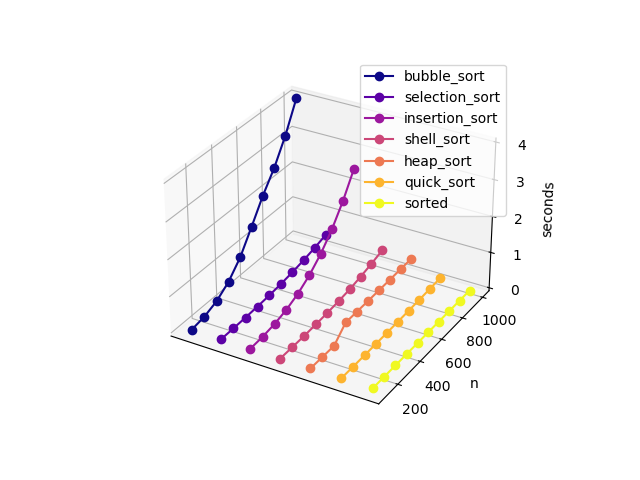

In [150]:
rnplot(bubble_sort, selection_sort, insertion_sort, shell_sort, heap_sort, quick_sort, sorted)